In [1]:
# std
import os
import sys
import re

# 3rd party
import psycopg2 as pg
import pandas as pd
import pandas.io.sql as psql
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# get connected to the database
connection = pg.connect(user='scientist',
                        password='******',
                        host='127.0.01',
                        port='5432',
                        database='tensor_factorisation_wn18')

In [3]:
entity = psql.read_sql("SELECT * FROM entity", connection)
entity.head()

,synset_id,name,pos_tag,sense_index,definition
0,14854262,stool,NN,2,solid excretory product evacuated from the bowels
1,00590383,chieftainship,NN,1,the position of chieftain
2,08769179,saxony,NN,1,an area in Germany around the upper Elbe river...
3,02338145,ondatra zibethica,NN,1,beaver-like aquatic rodent of North America wi...
4,01990168,founder,VB,2,sink below the surface


In [4]:
entity.count()

synset_id      40943
name           40943
pos_tag        40943
sense_index    40943
definition     40943
dtype: int64

In [5]:
entity_counts = entity.count().to_frame()
entity_counts.head()

,0
synset_id,40943
name,40943
pos_tag,40943
sense_index,40943
definition,40943


In [6]:
entity_counts = entity_counts.reset_index()
entity_counts.head()

,index,0
0,synset_id,40943
1,name,40943
2,pos_tag,40943
3,sense_index,40943
4,definition,40943


In [7]:
entity_counts = entity_counts.rename(columns={'index': 'label', 0: 'value'})
entity_counts.head()

,label,value
0,synset_id,40943
1,name,40943
2,pos_tag,40943
3,sense_index,40943
4,definition,40943


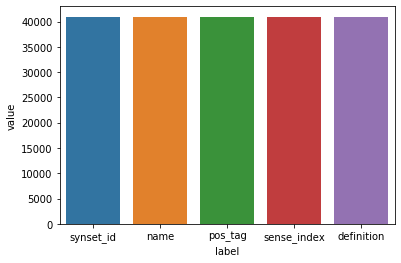

In [8]:
ax = sns.barplot(x="label", y="value", data=entity_counts)

In [9]:
relation = psql.read_sql("SELECT * FROM relation", connection)
relation.head()

,id,name
0,1,hypernym
1,2,synset domain usage of
2,3,also see
3,4,member of domain region
4,5,similar to


In [10]:
relation_counts = relation.count().to_frame()
relation_counts.head()

,0
id,18
name,18


In [11]:
relation_counts = relation_counts.reset_index()
relation_counts.head()

,index,0
0,id,18
1,name,18


In [12]:
relation_counts = relation_counts.rename(columns={'index': 'label', 0: 'value'})
relation_counts.head()

,label,value
0,id,18
1,name,18


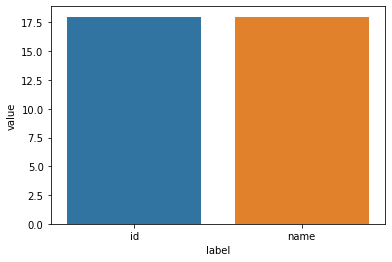

In [13]:
ax = sns.barplot(x="label", y="value", data=relation_counts)

In [14]:
triple = psql.read_sql("SELECT * FROM train UNION SELECT * FROM valid UNION SELECT * FROM test", connection)
triple.head()

,id,subject,predicate,object
0,1,02174461,hypernym,02176268
1,1,03964744,hyponym,04371774
2,1,06845599,member of domain usage,03754979
3,2,00260881,hypernym,00260622
4,2,00789448,verb group,01062739


In [15]:
triple_counts = triple.count().to_frame()
triple_counts.head()

,0
id,151442
subject,151442
predicate,151442
object,151442


In [16]:
triple_counts = triple_counts.reset_index()
triple_counts.head()

,index,0
0,id,151442
1,subject,151442
2,predicate,151442
3,object,151442


In [17]:
triple_counts = triple_counts.rename(columns={'index': 'label', 0: 'value'})
triple_counts.head()

,label,value
0,id,151442
1,subject,151442
2,predicate,151442
3,object,151442


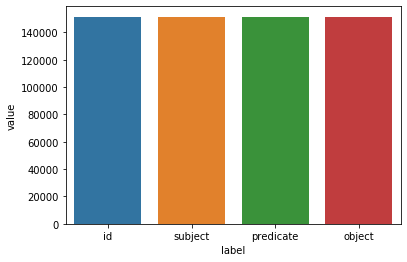

In [18]:
ax = sns.barplot(x="label", y="value", data=triple_counts)

In [19]:
triple_entity_relation_counts = pd.DataFrame([triple_counts.loc[0, 'value'], 
                                              entity_counts.loc[0, 'value'], 
                                              relation_counts.loc[0, 'value']], index=['triple', 'entity', 'relation'])
triple_entity_relation_counts.head()

,0
triple,151442
entity,40943
relation,18


In [20]:
triple_entity_relation_counts = triple_entity_relation_counts.reset_index()
triple_entity_relation_counts.head()

,index,0
0,triple,151442
1,entity,40943
2,relation,18


In [21]:
triple_entity_relation_counts = triple_entity_relation_counts.rename(columns={'index': 'label', 0: 'value'})
triple_entity_relation_counts.head()

,label,value
0,triple,151442
1,entity,40943
2,relation,18


In [22]:
tmp = triple_entity_relation_counts.iloc[0]
triple_entity_relation_counts.iloc[0] = triple_entity_relation_counts.iloc[1]
triple_entity_relation_counts.iloc[1] = triple_entity_relation_counts.iloc[2]
triple_entity_relation_counts.iloc[2] = tmp
triple_entity_relation_counts

,label,value
0,entity,40943
1,relation,18
2,triple,151442


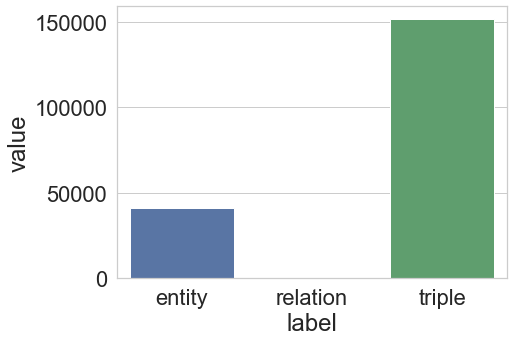

In [23]:
plt.figure(figsize=(7, 5))
sns.set(style="whitegrid", font_scale=2) 
ax = sns.barplot(x="label", y="value", data=triple_entity_relation_counts)
plt.savefig('WN18_Counts.png', bbox_inches = "tight", format='PNG')

In [24]:
fact = psql.read_sql("SELECT * FROM fact_train UNION SELECT * FROM fact_valid UNION SELECT * FROM fact_test", connection)
fact.head()

,id,subject,s_name,predicate,object,o_name
0,1,02174461,clangour,hypernym,02176268,sound
1,1,03964744,toy,hyponym,04371774,swing
2,1,06845599,trade name,member of domain usage,03754979,metharbital
3,2,00260881,land reform,hypernym,00260622,reform
4,2,00789448,telephone,verb group,01062739,call


In [25]:
fact = fact.set_index('id')
fact.head()

,subject,s_name,predicate,object,o_name
id,,,,,
1,02174461,clangour,hypernym,02176268,sound
1,03964744,toy,hyponym,04371774,swing
1,06845599,trade name,member of domain usage,03754979,metharbital
2,00260881,land reform,hypernym,00260622,reform
2,00789448,telephone,verb group,01062739,call


In [26]:
predicate_counts = fact['predicate'].value_counts(dropna=False)
predicate_counts.head(50)

hyponym                        37221
hypernym                       37221
derivationally related form    31867
member meronym                  7928
member holonym                  7928
part of                         5148
has part                        5142
member of domain topic          3341
synset domain topic of          3335
instance hyponym                3150
instance hypernym               3150
also see                        1396
verb group                      1220
member of domain region          983
synset domain region of          982
member of domain usage           675
synset domain usage of           669
similar to                        86
Name: predicate, dtype: int64

In [27]:
predicate_counts.index

Index(['hyponym', 'hypernym', 'derivationally related form', 'member meronym',
       'member holonym', 'part of', 'has part', 'member of domain topic',
       'synset domain topic of', 'instance hyponym', 'instance hypernym',
       'also see', 'verb group', 'member of domain region',
       'synset domain region of', 'member of domain usage',
       'synset domain usage of', 'similar to'],
      dtype='object')

In [28]:
predicate_counts = predicate_counts.reset_index()
predicate_counts.head(50)

,index,predicate
0,hyponym,37221
1,hypernym,37221
2,derivationally related form,31867
3,member meronym,7928
4,member holonym,7928
5,part of,5148
6,has part,5142
7,member of domain topic,3341
8,synset domain topic of,3335
9,instance hyponym,3150


In [29]:
predicate_counts = predicate_counts.rename(columns={'index': 'label', 'predicate': 'value'})
predicate_counts.head()

,label,value
0,hyponym,37221
1,hypernym,37221
2,derivationally related form,31867
3,member meronym,7928
4,member holonym,7928


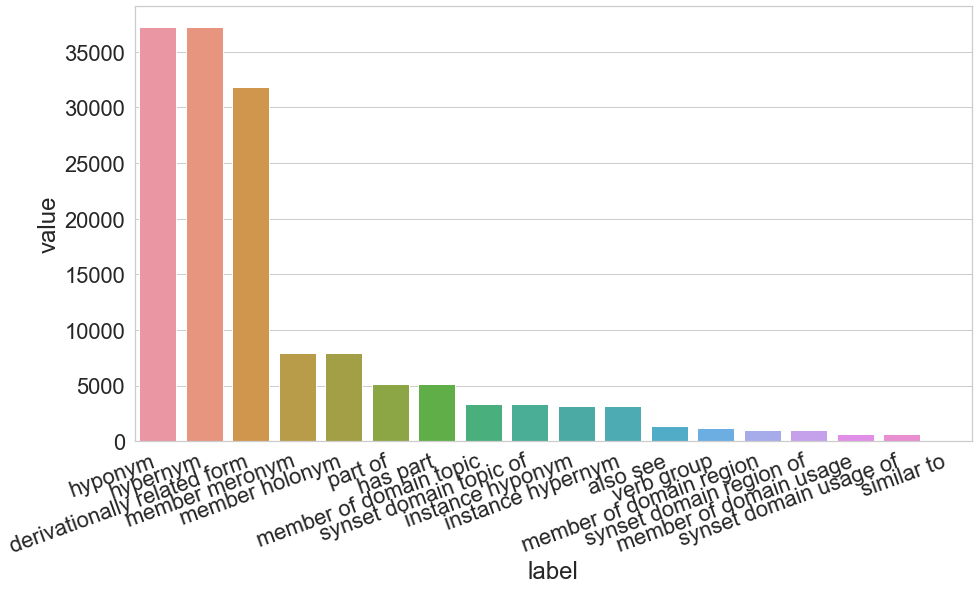

In [30]:
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid", font_scale=2) 
ax = sns.barplot(x="label", y="value", data=predicate_counts[:50])
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
plt.savefig('WN18_Predicate_Counts.png', bbox_inches = "tight", format='PNG')

In [31]:
predicate_counts.count(), predicate_counts.max(), predicate_counts.min(), predicate_counts.median()

(label    18
 value    18
 dtype: int64, label    verb group
 value         37221
 dtype: object, label    also see
 value          86
 dtype: object, value    3242.5
 dtype: float64)

In [32]:
# Computing IQR
Q1 = predicate_counts.quantile(0.25)
Q3 = predicate_counts.quantile(0.75)
IQR = Q3 - Q1
IQR

value    6190.75
dtype: float64

In [33]:
object_counts = fact['o_name'].value_counts(dropna=False).to_frame()
object_counts.head(50)

,o_name
urban center,520
united kingdom of great britain and northern ireland,498
soul,414
war machine,367
law,311
asterid dicot genus,306
bird genus,295
modify,284
mammal genus,265
rosid dicot genus,255


In [34]:
object_counts.index

Index(['urban center', 'united kingdom of great britain and northern ireland',
       'soul', 'war machine', 'law', 'asterid dicot genus', 'bird genus',
       'modify', 'mammal genus', 'rosid dicot genus',
       ...
       'unusualness', 'procuress', 'zwingli', 'bloodworm', 'pinus jeffreyi',
       'goldworker', 'plantation', 'varied', 'wild sweet potato vine',
       'three-d'],
      dtype='object', length=32543)

In [35]:
object_counts = object_counts.reset_index()
object_counts.head()

,index,o_name
0,urban center,520
1,united kingdom of great britain and northern i...,498
2,soul,414
3,war machine,367
4,law,311


In [36]:
object_counts = object_counts.rename(columns={'index': 'label', 'o_name': 'value'})
object_counts.head()

,label,value
0,urban center,520
1,united kingdom of great britain and northern i...,498
2,soul,414
3,war machine,367
4,law,311


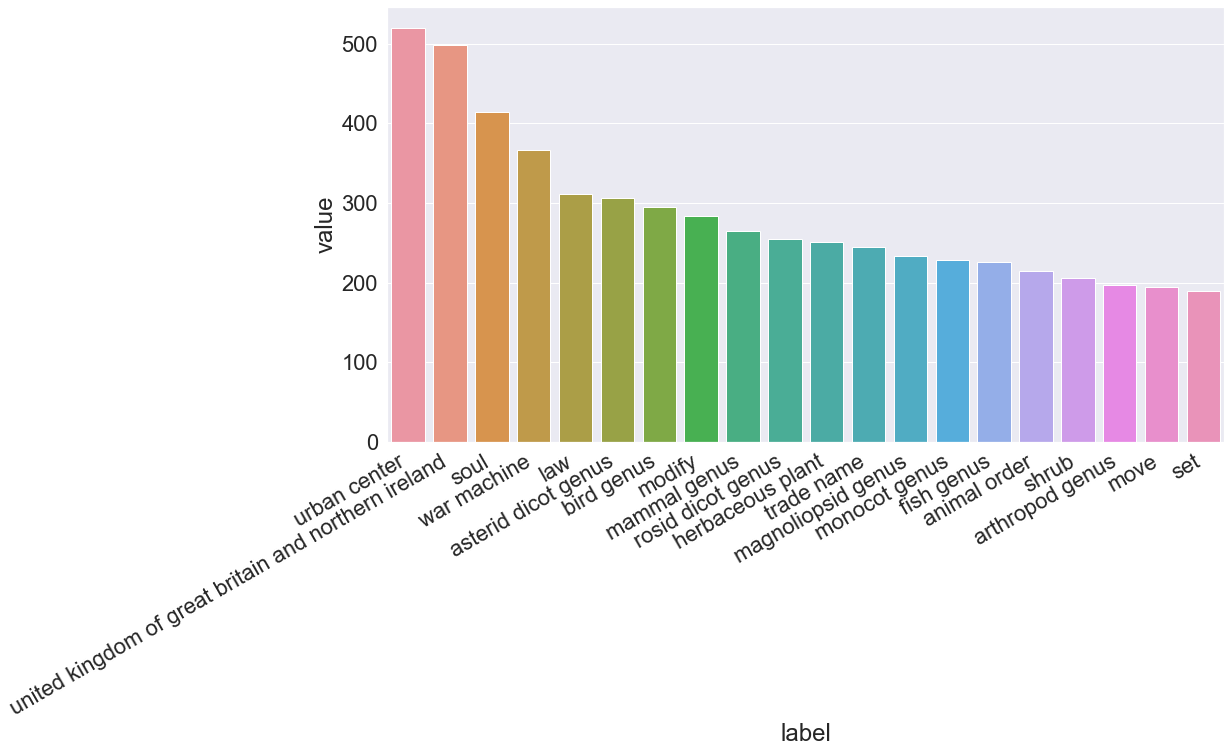

In [37]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=2) 
ax = sns.barplot(x="label", y="value", data=object_counts[:20])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
plt.savefig('WN18_Object_Counts.png', bbox_inches = "tight", format='PNG')

In [38]:
object_counts.count(), object_counts.max(), object_counts.min(), object_counts.median()

(label    32543
 value    32543
 dtype: int64, label    zymotic
 value        520
 dtype: object, label    'hood
 value        1
 dtype: object, value    3.0
 dtype: float64)

In [39]:
# Computing IQR
Q1 = object_counts.quantile(0.25)
Q3 = object_counts.quantile(0.75)
IQR = Q3 - Q1
IQR

value    2.0
dtype: float64

In [43]:
subject_counts = fact['s_name'].value_counts().to_frame()
subject_counts.head()

,s_name
urban center,520
united kingdom of great britain and northern ireland,498
soul,415
war machine,367
law,312


In [44]:
subject_counts.index

Index(['urban center', 'united kingdom of great britain and northern ireland',
       'soul', 'war machine', 'law', 'asterid dicot genus', 'bird genus',
       'modify', 'mammal genus', 'rosid dicot genus',
       ...
       'orthodox sleep', 'sandbag', 'impost', 'viscount nelson', 'paul iii',
       'aurora', 'mn', 'hewer', 'inefficacious', 'the great compromiser'],
      dtype='object', length=32544)

In [45]:
subject_counts = subject_counts.reset_index()
subject_counts.head()

,index,s_name
0,urban center,520
1,united kingdom of great britain and northern i...,498
2,soul,415
3,war machine,367
4,law,312


In [46]:
subject_counts = subject_counts.rename(columns={'index': 'label', 's_name': 'value'})
subject_counts.head()

,label,value
0,urban center,520
1,united kingdom of great britain and northern i...,498
2,soul,415
3,war machine,367
4,law,312


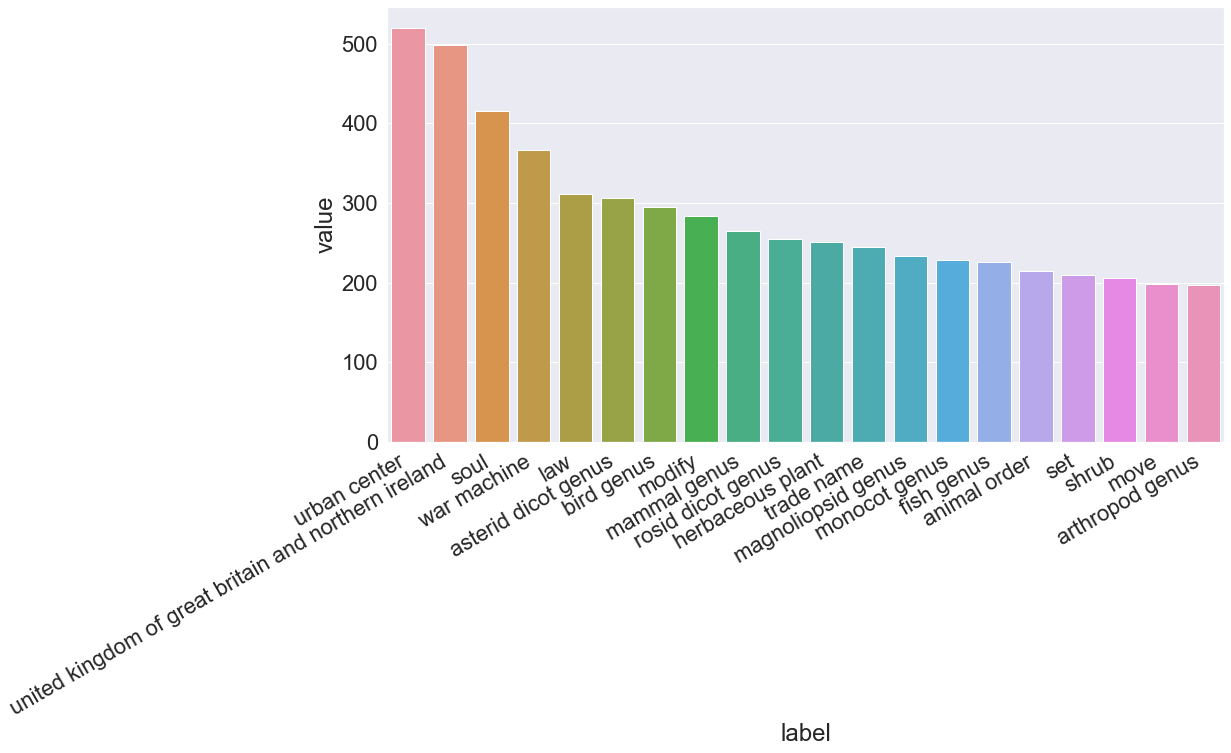

In [47]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=2) 
ax = sns.barplot(x="label", y="value", data=subject_counts[:20])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
plt.savefig('WN18_Subject_Counts.png', bbox_inches = "tight", format='PNG')

In [48]:
subject_counts.count(), subject_counts.max(), subject_counts.min(), subject_counts.median()

(label    32544
 value    32544
 dtype: int64, label    zymotic
 value        520
 dtype: object, label    'hood
 value        1
 dtype: object, value    3.0
 dtype: float64)

In [49]:
# Computing IQR
Q1 = subject_counts.quantile(0.25)
Q3 = subject_counts.quantile(0.75)
IQR = Q3 - Q1
IQR

value    2.0
dtype: float64